# Loading Data

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Drug Classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/drive/MyDrive/Colab Notebooks/Drug Classification/03. drugclassification-99-score-various-models-eda.ipynb
/content/drive/MyDrive/Colab Notebooks/Drug Classification/Untitled document.gdoc
/content/drive/MyDrive/Colab Notebooks/Drug Classification/01. drug-classification-with-different-algorithms.ipynb
/content/drive/MyDrive/Colab Notebooks/Drug Classification/02. drug-classification-rf-nn.ipynb
/content/drive/MyDrive/Colab Notebooks/Drug Classification/Drug Dataset/drug200.csv


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Drug Classification/Drug Dataset/drug200.csv')

# Exploring Data

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [9]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [10]:
df['Drug'].value_counts()   

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

# Data Visualization


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


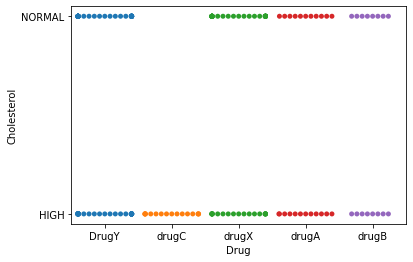

In [11]:
import seaborn as sns
sns.swarmplot(data=df,x='Drug',y='Cholesterol')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


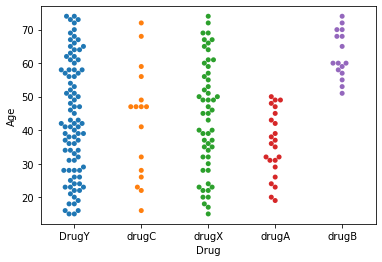

In [13]:
sns.swarmplot(data=df,x='Drug',y='Age')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


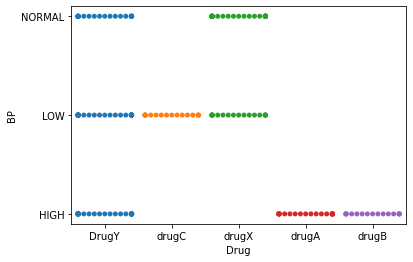

In [14]:
sns.swarmplot(data=df,x='Drug',y='BP')

# Split Data

In [15]:
X = df.drop('Drug',axis=1)
y = df['Drug']

In [16]:
X = pd.get_dummies(X,['Age','BP','Cholesterol'])
y = pd.get_dummies(y,['Drug'])

In [17]:
X.head()

,Age,Na_to_K,Age_F,Age_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [18]:
y.head()

,['Drug']_DrugY,['Drug']_drugA,['Drug']_drugB,['Drug']_drugC,['Drug']_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Building Model 1 -> RF

In [20]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model_1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [21]:
y_pred = model_1.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test,y_pred)

1.0

# Building Model 2 -> NN

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout ,Flatten
from tensorflow.keras.layers.experimental.preprocessing import Normalization

In [25]:
normalize = Normalization()

In [26]:
model_2 = Sequential([
    normalize,
    Flatten(input_shape=(9,)),
    Dense(32, activation='tanh'),
    Dropout(0.5),
    Dense(5, activation='sigmoid'),
])

model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

In [28]:
model_2.fit(x=X_train, 
          y=y_train, 
          epochs=1000,
          batch_size=10,
          validation_data=(X_test, y_test),
           callbacks=[early_stop]
          )

Epoch 1/1000
14/14 [==============================] - 1s 17ms/step - loss: 2.3233 - accuracy: 0.2761 - val_loss: 1.8982 - val_accuracy: 0.4394
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 2.0680 - accuracy: 0.3209 - val_loss: 1.7273 - val_accuracy: 0.4394
Epoch 3/1000
14/14 [==============================] - 0s 3ms/step - loss: 2.0404 - accuracy: 0.3060 - val_loss: 1.5796 - val_accuracy: 0.4394
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 2.0739 - accuracy: 0.2836 - val_loss: 1.4796 - val_accuracy: 0.4394
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 1.8599 - accuracy: 0.3284 - val_loss: 1.3830 - val_accuracy: 0.4394
Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 1.7012 - accuracy: 0.3433 - val_loss: 1.3313 - val_accuracy: 0.4394
Epoch 7/1000
14/14 [==============================] - 0s 14ms/step - loss: 1.8227 - accuracy: 0.3433 - val_loss: 1.2873 - val_accuracy: 0.4394
Epoc

In [29]:
model_2.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9545


[0.1436426043510437, 0.9545454382896423]